## Handling Missing Values in Large-scale ML Pipelines:

**Task 1**: Impute with Mean or Median
- Step 1: Load a dataset with missing values (e.g., Boston Housing dataset).
- Step 2: Identify columns with missing values.
- Step 3: Impute missing values using the mean or median of the respective columns.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# Step 2: Simulate missing values for demonstration
np.random.seed(42)
X.loc[X.sample(frac=0.1).index, 'MedInc'] = np.nan  # Simulate missing values
X.loc[X.sample(frac=0.05).index, 'AveRooms'] = np.nan

print("Before Imputation:")
print(X.isnull().sum())

# Step 3: Identify columns with missing values
missing_columns = X.columns[X.isnull().any()].tolist()
print(f"\nColumns with missing values: {missing_columns}")

# Step 4: Impute missing values using Mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nAfter Imputation:")
print(X_imputed.isnull().sum())

Before Imputation:
MedInc        2064
HouseAge         0
AveRooms      1032
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
dtype: int64

Columns with missing values: ['MedInc', 'AveRooms']

After Imputation:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


**Task 2**: Impute with the Most Frequent Value
- Step 1: Use the Titanic dataset and identify columns with missing values.
- Step 2: Impute categorical columns using the most frequent value.

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Step 1: Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Check missing values
print("Missing values before imputation:\n", df.isnull().sum())

# Step 3: Select categorical columns with missing values
categorical_cols = df.select_dtypes(include=['object']).columns
missing_cat_cols = [col for col in categorical_cols if df[col].isnull().any()]
print("\nCategorical columns with missing values:", missing_cat_cols)

# Step 4: Impute using the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')
df[missing_cat_cols] = imputer.fit_transform(df[missing_cat_cols])

# Step 5: Verify imputation
print("\nMissing values after imputation:\n", df[missing_cat_cols].isnull().sum())

Missing values before imputation:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Categorical columns with missing values: ['Cabin', 'Embarked']

Missing values after imputation:
 Cabin       0
Embarked    0
dtype: int64


**Task 3**: Advanced Imputation - k-Nearest Neighbors
- Step 1: Implement KNN imputation using the KNNImputer from sklearn.
- Step 2: Explore how KNN imputation improves data completion over simpler methods.

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Select numeric and relevant categorical columns
df = df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]  # Include categorical for context

# Encode categorical columns for KNNImputer
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Ensure strings
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 3: Check missing values before imputation
print("Missing values before KNN imputation:\n", df.isnull().sum())

# Step 4: Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 5: Check missing values after imputation
print("\nMissing values after KNN imputation:\n", df_imputed.isnull().sum())

# Optional: Compare imputed values vs. original
print("\nOriginal 'Age' values with NaNs:")
print(df['Age'].head(10))

print("\nImputed 'Age' values:")
print(df_imputed['Age'].head(10))

Missing values before KNN imputation:
 Age         177
Fare          0
Pclass        0
Sex           0
Embarked      0
dtype: int64

Missing values after KNN imputation:
 Age         0
Fare        0
Pclass      0
Sex         0
Embarked    0
dtype: int64

Original 'Age' values with NaNs:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Imputed 'Age' values:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    47.4
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


## Feature Scaling & Normalization Best Practices:

**Task 1**: Standardization
- Step 1: Standardize features using StandardScaler.
- Step 2: Observe how standardization affects data distribution.

Original data stats:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Standardized data stats:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
m

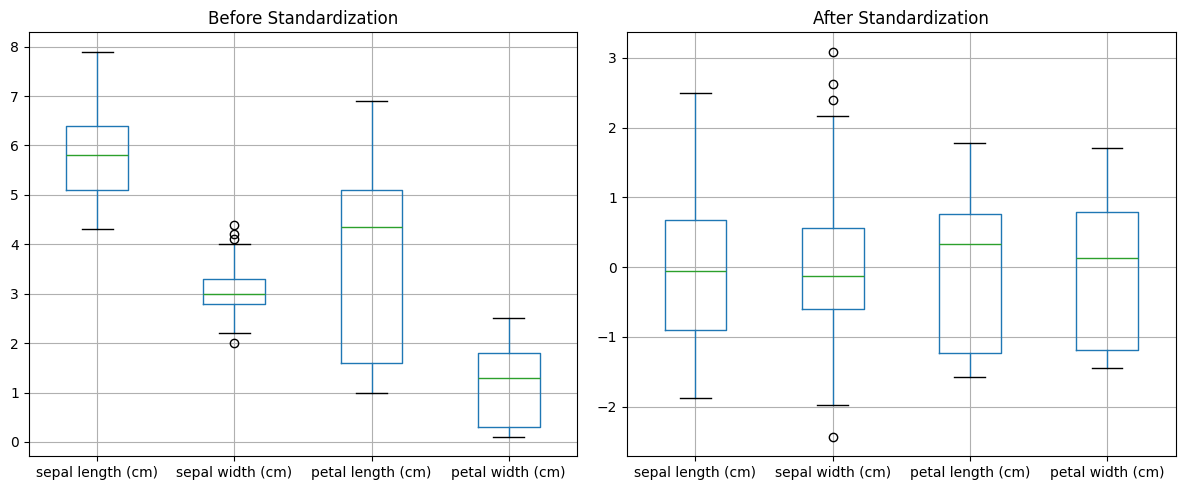

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load sample dataset (Iris)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display original data distribution
print("Original data stats:\n", df.describe())

# Step 2: Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display standardized data distribution
print("\nStandardized data stats:\n", df_scaled.describe())

# Step 3: Visual comparison (before vs after)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot()
plt.title("Before Standardization")

plt.subplot(1, 2, 2)
df_scaled.boxplot()
plt.title("After Standardization")

plt.tight_layout()
plt.show()

**Task 2**: Min-Max Scaling

- Step 1: Scale features to lie between 0 and 1 using MinMaxScaler.
- Step 2: Compare with standardization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load sample dataset (Iris)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display original data distribution
print("Original data stats:\n", df.describe())

# Step 2: Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display standardized data distribution
print("\nStandardized data stats:\n", df_scaled.describe())

# Step 3: Visual comparison (before vs after)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot()
plt.title("Before Standardization")

plt.subplot(1, 2, 2)
df_scaled.boxplot()
plt.title("After Standardization")

plt.tight_layout()
plt.show()

**Task 3**: Robust Scaling
- Step 1: Scale features using RobustScaler, which is useful for data with outliers.
- Step 2: Assess changes in data scaling compared to other scaling methods.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Step 1: Load dataset (Iris)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Apply different scalers
robust_scaled = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
standard_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

# Step 3: Visualize the effect of each scaling
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
df.boxplot()
plt.title("Original Data")

plt.subplot(2, 2, 2)
robust_scaled.boxplot()
plt.title("Robust Scaled Data")

plt.subplot(2, 2, 3)
standard_scaled.boxplot()
plt.title("Standard Scaled Data")

plt.subplot(2, 2, 4)
minmax_scaled.boxplot()
plt.title("Min-Max Scaled Data")

plt.tight_layout()
plt.show()

## Feature Selection Techniques:
### Removing Highly Correlated Features:

**Task 1**: Correlation Matrix
- Step 1: Compute correlation matrix.
- Step 2: Remove highly correlated features (correlation > 0.9).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Step 2: Compute correlation matrix
corr_matrix = df.corr().abs()

# Display heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 4: Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

# Step 5: Drop highly correlated features
df_reduced = df.drop(columns=to_drop)

print("\nOriginal shape:", df.shape)
print("Reduced shape :", df_reduced.shape)

### Using Mutual Information & Variance Thresholds:

**Task 2**: Mutual Information
- Step 1: Compute mutual information between features and target.
- Step 2: Retain features with high mutual information scores.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 2: Compute mutual information between features and target
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_series)

# Optional: Plot mutual information scores
plt.figure(figsize=(10,6))
sns.barplot(x=mi_series.values, y=mi_series.index)
plt.title("Mutual Information Scores for Features")
plt.show()

# Step 3: Retain features with mutual information above a threshold (e.g., > 0.1)
selected_features = mi_series[mi_series > 0.1].index.tolist()
X_selected = X[selected_features]
print("\nSelected Features based on Mutual Information:\n", selected_features)

# Step 4: Apply VarianceThreshold to remove low variance features
selector = VarianceThreshold(threshold=0.01)  # threshold can be adjusted
X_var_filtered = selector.fit_transform(X_selected)

# Get retained feature names after variance thresholding
features_after_variance = X_selected.columns[selector.get_support()]
print("\nFeatures after Variance Thresholding:\n", list(features_after_variance))

# Optional: Shape before and after
print(f"\nShape before variance thresholding: {X_selected.shape}")
print(f"Shape after variance thresholding : {X_var_filtered.shape}")

**Task 3**: Variance Threshold
- Step 1: Implement VarianceThreshold to remove features with low variance.
- Step 2: Analyze impact on feature space.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold

# Step 1: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(f"Original number of features: {X.shape[1]}")

# Step 2: Apply VarianceThreshold to remove low variance features
# Set threshold (e.g., remove features with variance less than 0.01)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

X_var_filtered = selector.fit_transform(X)

# Get retained feature names
features_after_var_thresh = X.columns[selector.get_support()]

print(f"Number of features after variance thresholding: {X_var_filtered.shape[1]}")
print("Features retained:")
print(list(features_after_var_thresh))

# Optional: Show variance of each feature before and after thresholding
variances = X.var()
print("\nFeature variances before thresholding:")
print(variances.sort_values(ascending=True))

print("\nVariance threshold:", threshold)